In [1]:
import pandas as pd

df = pd.read_csv("/Users/maitrychauhan/Desktop/stockdata/stocks_appended.csv")

In [3]:
fields = [
    "Apr_1_2024",
    "Mar_1_2024",
    "Feb_1_2024",
    "Jan_1_2024",
    "Dec_1_2023",
    "Nov_1_2023",
    "Oct_1_2023",
    "Sep_1_2023",
    "Aug_1_2023",
    "Jul_1_2023",
    "Jun_1_2023",
    "May_1_2023",
    "Apr_1_2023",
    "Mar_1_2023",
    "Feb_1_2023",
    "Jan_1_2023",
    "Dec_1_2022",
    "Nov_1_2022",
    "Oct_1_2022",
    "Sep_1_2022",
    "Aug_1_2022",
    "Jul_1_2022",
    "Jun_1_2022",
    "May_1_2022",
    "Apr_1_2022",
    "Mar_1_2022",
    "Feb_1_2022",
    "Jan_1_2022",
    "Dec_1_2021",
    "Nov_1_2021",
    "Oct_1_2021",
    "Sep_1_2021",
    "Aug_1_2021",
    "Jul_1_2021",
    "Jun_1_2021",
    "May_1_2021",
    "Apr_1_2021",
    "Mar_1_2021",
    "Feb_1_2021",
    "Jan_1_2021",
    "Dec_1_2020",
    "Nov_1_2020",
    "Oct_1_2020",
    "Sep_1_2020",
    "Aug_1_2020",
    "Jul_1_2020",
    "Jun_1_2020",
    "May_1_2020",
    "Apr_1_2020",
    "Mar_1_2020",
    "Feb_1_2020",
    "Jan_1_2020",
    "Dec_1_2019",
    "Nov_1_2019",
    "Oct_1_2019",
    "Sep_1_2019",
    "Aug_1_2019",
    "Jul_1_2019",
    "Jun_1_2019",
    "May_1_2019"
]


In [4]:
for col in fields:
    df[col] = df[col].str.replace(",", "").astype(float)

In [5]:
df.dtypes

Unnamed: 0        int64
avg_vol_3m       object
change          float64
company_name     object
last_price      float64
                 ...   
Sep_1_2019      float64
Aug_1_2019      float64
Jul_1_2019      float64
Jun_1_2019      float64
May_1_2019      float64
Length: 71, dtype: object

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select only numeric columns and drop 'Unnamed' columns
numeric_data = df.select_dtypes(include=[np.number])
# numeric_data.drop(columns=['week_52_range'], inplace=True)


# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

# Scale the data for normalization
scaler = StandardScaler()
numeric_data_scaled = pd.DataFrame(scaler.fit_transform(numeric_data_imputed), columns=numeric_data_imputed.columns)

numeric_data_scaled.head()  # Return the first few rows of the scaled data


,Unnamed: 0,change,last_price,market_cap,volume,Apr_1_2024,Mar_1_2024,Feb_1_2024,Jan_1_2024,Dec_1_2023,...,Feb_1_2020,Jan_1_2020,Dec_1_2019,Nov_1_2019,Oct_1_2019,Sep_1_2019,Aug_1_2019,Jul_1_2019,Jun_1_2019,May_1_2019
0,-1.730440,-0.312796,0.784476,4.763355,0.024037,0.802099,0.770414,0.800192,0.795844,0.730229,...,0.747197,0.775147,0.782761,0.763810,0.759002,0.737028,0.716736,0.759887,0.822087,0.804299
1,-1.727218,-0.010068,0.146851,2.915808,0.580883,0.137457,0.134545,0.119173,0.115288,0.109309,...,0.173717,0.219354,0.257655,0.222175,0.206423,0.167452,0.120285,0.162241,0.141656,0.148415
2,-1.723996,-0.297099,0.387674,2.940921,0.129480,0.388686,0.362017,0.413669,0.436746,0.409684,...,0.590972,0.621454,0.550050,0.544869,0.546443,0.509967,0.572708,0.576577,0.556144,0.545488
3,-1.720773,-0.389039,0.953969,2.203229,-0.081520,0.947437,0.946691,0.999490,1.008709,0.962708,...,1.280508,1.327560,1.217375,1.203835,1.163887,1.137743,1.213789,1.206568,1.166834,1.192050
4,-1.717551,0.093084,-0.319870,1.442090,3.217780,-0.322100,-0.334314,-0.342910,-0.340898,-0.344766,...,-0.383111,-0.381472,-0.370422,-0.380022,-0.383915,-0.390712,-0.404758,-0.407938,-0.414128,-0.420697


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Assuming numeric_data_scaled is your preprocessed DataFrame
# numeric_data_scaled = ...  # Replace with your actual DataFrame

# Test different DBSCAN parameters
eps_values = [0.5, 1.0, 1.5, 2.0]  # Example range for eps
min_samples_values = [2, 3, 4, 5]  # Example range for min_samples

# Create subplots to visualize the clustering with different parameter combinations
# fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 10), sharex=True, sharey=True)

# Ensure axes is a 2D array for easier indexing
# axes = axes.reshape((len(eps_values), len(min_samples_values)))

# Test and plot the clusters with varying DBSCAN parameters
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Apply DBSCAN with current parameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster = dbscan.fit_predict(numeric_data_scaled)
        df['cluster'] = cluster  # Cluster data
        
#         # Plot the clusters with different colors
#         ax = axes[i, j]
#         ax.scatter(
#             numeric_data_scaled["feature1"],  # Change to appropriate column name
#             numeric_data_scaled["feature2"],  # Change to appropriate column name
#             c=numeric_data_scaled["cluster"],
#             cmap="viridis",
#             s=10
#         )
#         ax.set_title(f"eps={eps}, min_samples={min_samples}")

# plt.tight_layout()  # Adjust subplots to prevent overlap
# plt.show()  # Display the plots


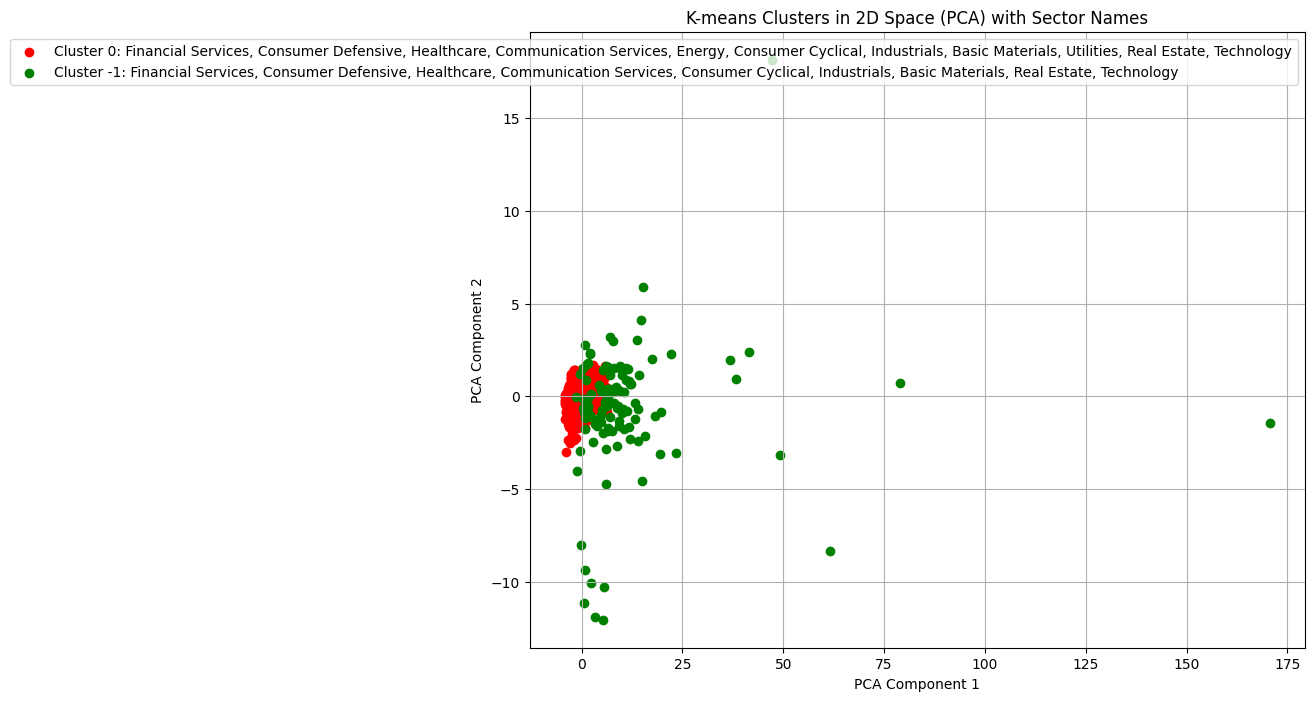

In [22]:
# Reduce dimensions to 2D using PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_data_scaled)

# Create a DataFrame with the PCA results and cluster labels
cluster_plot_data = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
cluster_plot_data['cluster'] = cluster

# Define color mapping for the clusters (red, green, blue)
cluster_colors = {0: 'red', -1: 'green'}

# Create scatter plot with cluster colors and sector names
plt.figure(figsize=(10, 8))
for cluster_id in cluster_colors:
    cluster_data = cluster_plot_data[cluster_plot_data['cluster'] == cluster_id]
    sector_names = df.loc[cluster_data.index, 'sector_name'].unique()

    # Scatter plot with the specified color and sector names in the label
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], color=cluster_colors[cluster_id], label=f'Cluster {cluster_id}: {", ".join(sector_names)}')

plt.title('K-means Clusters in 2D Space (PCA) with Sector Names')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()  # Display the scatter plot with cluster colors and sector labels

In [23]:
# Assuming 'cluster' is the column with unique values
unique_clusters = df["cluster"].unique()  # Get unique values in the 'cluster' column

# Loop through unique clusters and print rows for each
for cluster in unique_clusters:
    subset = df[df["cluster"] == cluster]  # Get rows for this cluster
    print(f"\n\nData for cluster {cluster}:")
    print(subset['company_name'].values)  # Print the DataFrame subset



Data for cluster -1:
['Berkshire Hathaway Inc.' 'Visa Inc.' 'Mastercard Incorporated'
 'The Goldman Sachs Group, Inc.' 'S&P Global Inc.' "Moody's Corporation"
 'PayPal Holdings, Inc.' 'Coinbase Global, Inc.'
 'Ameriprise Financial, Inc.' 'Costco Wholesale Corporation'
 'First Citizens BancShares, Inc.' 'Eli Lilly and Company'
 'Markel Group Inc.' 'UnitedHealth Group Incorporated'
 'Thermo Fisher Scientific Inc.' 'Elevance Health, Inc.'
 'FactSet Research Systems Inc.' 'Everest Group, Ltd.'
 'Coca-Cola Consolidated, Inc.' 'Vertex Pharmaceuticals Incorporated'
 'Regeneron Pharmaceuticals, Inc.' 'McKesson Corporation'
 'Kinsale Capital Group, Inc.' 'The Boston Beer Company, Inc.'
 'Graham Holdings Company' 'IDEXX Laboratories, Inc.'
 'West Pharmaceutical Services, Inc.' 'Alphabet Inc.'
 'Strategic Education, Inc.' 'Mettler-Toledo International Inc.'
 'Molina Healthcare, Inc.' 'Illumina, Inc.' 'Waters Corporation'
 'Meta Platforms, Inc.' 'Netflix, Inc.' 'Charter Communications, Inc.'
 'M